In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
data_1 = pd.read_csv('data_1.csv')
data_2 = pd.read_csv('data_2.csv')
data_3 = pd.read_csv('data_3.csv')

Text(7.524105636363636, 2891784.032222222, 'Ultimate/Fracture Stress: 2891784.03 N/m^2')

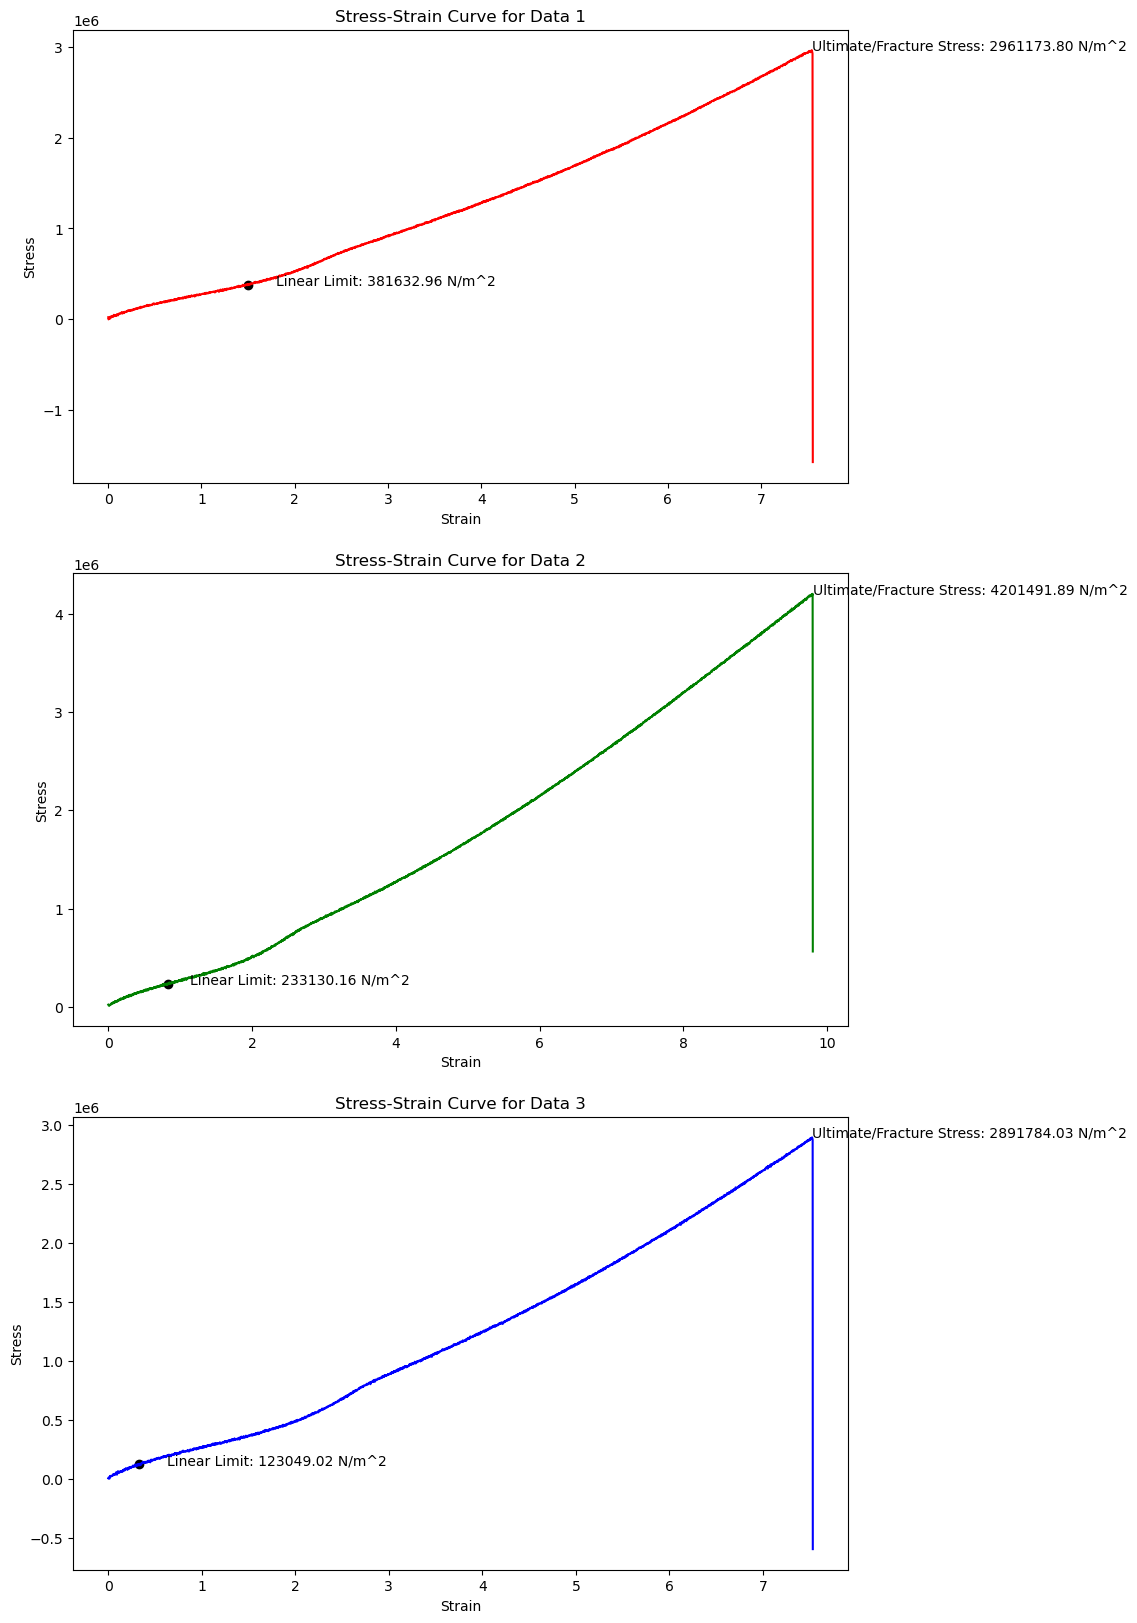

In [10]:
# data processing
L_0 = 33 * (10 ** -3) #m
A = (6 * 3) * (10 ** -6) #m^2

Elongation_1 = data_1['Elongation'] / 1000 #m
Force_1 = data_1['Force'] #N
stress_1 = Force_1 / A
strain_1 = Elongation_1 / L_0

Elongation_2 = data_2['Elongation'] / 1000 #m
Force_2 = data_2['Force'] #N
stress_2 = Force_2 / A
strain_2 = Elongation_2 / L_0

Elongation_3 = data_3['Elongation'] / 1000 #m
Force_3 = data_3['Force'] #N
stress_3 = Force_3 / A
strain_3 = Elongation_3 / L_0


ultimate_stress_1 = max(stress_1)
ultimate_stress_2 = max(stress_2)
ultimate_stress_3 = max(stress_3)

# Function to calculate derivatives
def calculate_derivatives(strain, stress, interval=50):
    derivatives = []
    for i in range(0, len(strain)-interval, interval):
        derivative = (stress[i+interval] - stress[i]) / (strain[i+interval] - strain[i])
        derivatives.append(derivative)
    return derivatives

# Function to find linear limit
def find_linear_limit(derivatives, threshold):
    for i, derivative in enumerate(derivatives):
        if i > 0 and abs(derivative - derivatives[i-1]) > threshold:
            return (i+1) * 50

# Calculate derivatives for each dataset
derivatives_1 = calculate_derivatives(strain_1, stress_1)
derivatives_2 = calculate_derivatives(strain_2, stress_2)
derivatives_3 = calculate_derivatives(strain_3, stress_3)

# Set interval for derivative calculation
interval = 50

# Calculate derivatives for each dataset
derivatives_1 = calculate_derivatives(strain_1, stress_1, interval)
derivatives_2 = calculate_derivatives(strain_2, stress_2, interval)
derivatives_3 = calculate_derivatives(strain_3, stress_3, interval)

# Set threshold for derivative variation
threshold = 80000  # Adjust as necessary

# Find linear limit
linear_limit_index_1 = find_linear_limit(derivatives_1, threshold)
linear_limit_index_2 = find_linear_limit(derivatives_2, threshold)
linear_limit_index_3 = find_linear_limit(derivatives_3, threshold)

# Set linear limit stress
linear_limit_1 = stress_1[linear_limit_index_1]
linear_limit_2 = stress_2[linear_limit_index_2]
linear_limit_3 = stress_3[linear_limit_index_3]

# Set fracture stress equal to ultimate stress
fracture_stress_1 = ultimate_stress_1
fracture_stress_2 = ultimate_stress_2
fracture_stress_3 = ultimate_stress_3



plt.figure(figsize=(10, 20))
plt.subplot(3, 1, 1)
plt.plot(strain_1, stress_1, 'r')
plt.xlabel('Strain')
plt.ylabel('Stress')
plt.title('Stress-Strain Curve for Data 1')

plt.subplot(3, 1, 2)
plt.plot(strain_2, stress_2, 'g')
plt.xlabel('Strain')
plt.ylabel('Stress')
plt.title('Stress-Strain Curve for Data 2')

plt.subplot(3, 1, 3)
plt.plot(strain_3, stress_3, 'b')
plt.xlabel('Strain')
plt.ylabel('Stress')
plt.title('Stress-Strain Curve for Data 3')
# Annotation
plt.subplot(3, 1, 1)
plt.scatter(strain_1[linear_limit_index_1], linear_limit_1, color='black')
plt.annotate(f'Linear Limit: {linear_limit_1:.2f} N/m^2', xy=(strain_1[linear_limit_index_1], linear_limit_1), xytext=(strain_1[linear_limit_index_1] + 0.3, linear_limit_1))
plt.annotate(f'Ultimate/Fracture Stress: {ultimate_stress_1:.2f} N/m^2', xy=(strain_1[stress_1.argmax()], ultimate_stress_1), xytext=(strain_1[stress_1.argmax()], ultimate_stress_1))

plt.subplot(3, 1, 2)
plt.scatter(strain_2[linear_limit_index_2], linear_limit_2, color='black')
plt.annotate(f'Linear Limit: {linear_limit_2:.2f} N/m^2', xy=(strain_2[linear_limit_index_2], linear_limit_2), xytext=(strain_2[linear_limit_index_2] + 0.3, linear_limit_2))
plt.annotate(f'Ultimate/Fracture Stress: {ultimate_stress_2:.2f} N/m^2', xy=(strain_2[stress_2.argmax()], ultimate_stress_2), xytext=(strain_2[stress_2.argmax()], ultimate_stress_2))

plt.subplot(3, 1, 3)
plt.scatter(strain_3[linear_limit_index_3], linear_limit_3, color='black')
plt.annotate(f'Linear Limit: {linear_limit_3:.2f} N/m^2', xy=(strain_3[linear_limit_index_3], linear_limit_3), xytext=(strain_3[linear_limit_index_3] + 0.3, linear_limit_3))
plt.annotate(f'Ultimate/Fracture Stress: {ultimate_stress_3:.2f} N/m^2', xy=(strain_3[stress_3.argmax()], ultimate_stress_3), xytext=(strain_3[stress_3.argmax()], ultimate_stress_3))

In [11]:
# Calculate Young's Modulus in the linear region
youngs_modulus_1 = linear_limit_1 / (strain_1[linear_limit_index_1])
youngs_modulus_2 = linear_limit_2 / (strain_2[linear_limit_index_2])
youngs_modulus_3 = linear_limit_3 / (strain_3[linear_limit_index_3])

# Print Young's Modulus
print(f"Young's Modulus for Data 1: {youngs_modulus_1:.2f} N/m^2")
print(f"Young's Modulus for Data 2: {youngs_modulus_2:.2f} N/m^2")
print(f"Young's Modulus for Data 3: {youngs_modulus_3:.2f} N/m^2")




Young's Modulus for Data 1: 254288.02 N/m^2
Young's Modulus for Data 2: 279521.94 N/m^2
Young's Modulus for Data 3: 368263.60 N/m^2
